### New File to Process Statistics of Evolved HP mechanisms

In [2]:
import numpy as np
from itertools import islice
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
#define a set of colors for use in the figure
viridian = '#277C5E'
new_viridian = '#29803C'
xanthous = '#F8AB25'
new_xanthous = '#F6AE2D'
flame = '#E46A3A'
new_flame = '#F26419'
redder = '#E92545'
french_gray = '#BEBFC5'
airforce_blue = '#5F8EB0'
neuroncolors = [(10/256,33/256,88/256),(29/256,92/256,167/256),(88/256,155/256,203/256)]
neuronlabels = ['LP','PY','PD']
abridged_neuronlabels = ['LP','PD']

First, the "highly fit" solutions

*note the indexes of re-evolved solutions are: 36, 78, 91, 92
They seem disproportionately resistant to evolving successful HPs, which is very suspicious

ValueError: cannot reshape array of size 121 into shape (6,6)

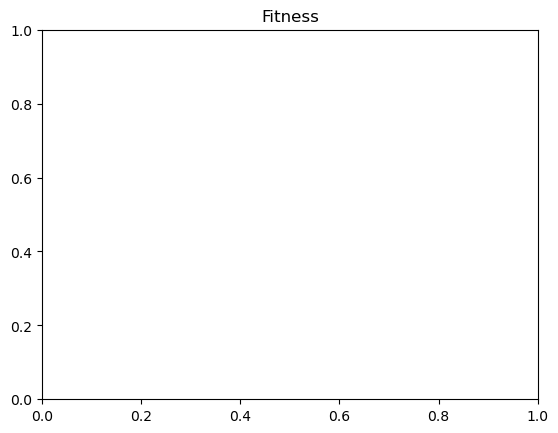

In [3]:
num_slns = 5
num_evols = 5

for i in range(num_slns):
    for j in range(num_evols):
        fitness_grid = np.loadtxt("./Specifically Evolved HP mechanisms/Every Circuit/%s/%s/recoverytest.dat"%(i,j))
        pts = fitness_grid[:,0:2]
        fitness = fitness_grid[:,2]
        pyloric = fitness.copy()
        pyloric[pyloric<.3] = 0
        pyloric[pyloric>=.3] = 1
        plt.title("Fitness")
        plt.imshow(fitness.reshape((6,6)))
        plt.colorbar()
        plt.show()
        plt.title("Pyloric count")
        plt.imshow(pyloric.reshape((6,6)),vmin=0,vmax=1)
        plt.show()


In [4]:
N = 2 #number of params that are being plastically controlled
num_indivs = 100
num_slns_per_indiv = 5

rangevals = np.zeros((num_indivs,num_slns_per_indiv,N))
UBvals = np.zeros((num_indivs,num_slns_per_indiv,N))
squishnum = np.zeros((num_indivs,num_slns_per_indiv))
tauvals = np.zeros((num_indivs,num_slns_per_indiv,N))
LBvals = np.zeros((num_indivs,num_slns_per_indiv,N))
SWvals = np.zeros((num_indivs,num_slns_per_indiv,N))
pylorics = np.zeros((num_indivs,num_slns_per_indiv))
for i in range(num_indivs):
    for j in range(num_slns_per_indiv):
        # print(i,j)
        fitness_grid = np.loadtxt('../Cpp/Specifically Evolved HP Mechanisms/Every Circuit/%s/%s/recoverytest.dat'%(i,j))
        pts = fitness_grid[:,0:2]
        fitness = fitness_grid[:,-1]
        pyloric = fitness.copy()
        # print(pyloric)
        pyloric[pyloric<.3] = 0
        pyloric[pyloric>=.3] = 1
        pylorics[i,j] = np.sum(pyloric)
        filename = '../Cpp/Specifically Evolved HP Mechanisms/Every Circuit/%s/%s/bestind.dat'%(i,j)
        with open(filename,"r") as f:
            plasticpars = np.loadtxt(islice(f, 1))
            [gen,phen] = np.loadtxt(islice(f, 2))
            fit = np.loadtxt(islice(f,3))
            taus = phen[0:N]
            LBs = phen[N:2*N]
            ranges = phen[2*N:3*N]
            UBs = np.clip(LBs+ranges,a_min=0,a_max=1)
            SWs = phen[3*N:4*N]
            UBvals[i,j] = UBs
            rangevals[i,j] = ranges
            tauvals[i,j] = taus
            LBvals[i,j] = LBs
            SWvals[i,j] = SWs
            for k in range(N):
                if ranges[k] < .05:
                    squishnum[i] += 1

In [5]:
rangevals_good = rangevals[np.where(pylorics==np.max(pylorics))]
rangevals_mixed = rangevals[np.where(((pylorics<np.max(pylorics))&(pylorics>0)))]
rangevals_bad = rangevals[np.where(pylorics==0)]
tauvals_good = tauvals[np.where(pylorics==np.max(pylorics))]
tauvals_mixed = tauvals[np.where(((pylorics<np.max(pylorics))&(pylorics>0)))]
tauvals_bad = tauvals[np.where(pylorics==0)]
LBvals_good = LBvals[np.where(pylorics==np.max(pylorics))]
LBvals_mixed = LBvals[np.where(((pylorics<np.max(pylorics))&(pylorics>0)))]
LBvals_bad = LBvals[np.where(pylorics==0)]
SWvals_good = SWvals[np.where(pylorics==np.max(pylorics))]
SWvals_mixed = SWvals[np.where(((pylorics<np.max(pylorics))&(pylorics>0)))]
SWvals_bad = SWvals[np.where(pylorics==0)]

In [8]:
print(np.max(rangevals_good[:,1]))

0.372632


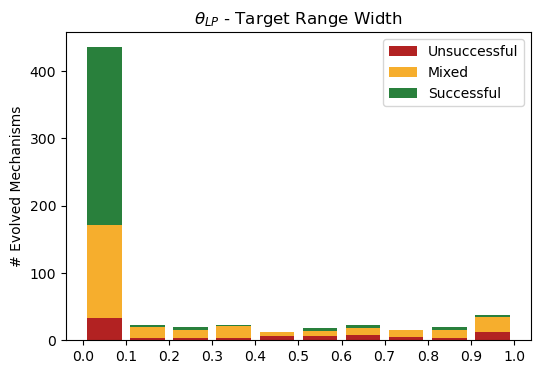

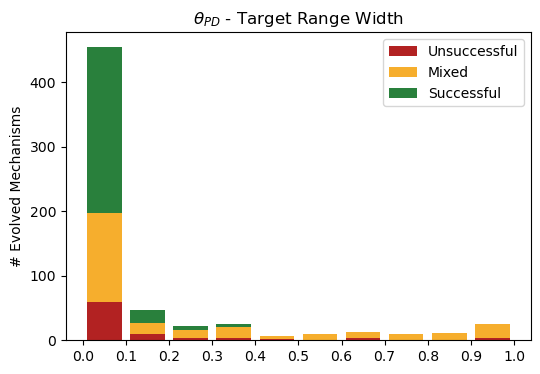

In [6]:
bins = np.arange(0,1.001,.1)
plt.rcParams['figure.figsize'] = (6,4)

for i in [0,1]:
    hist = plt.hist([rangevals_bad[:,i].flatten(),rangevals_mixed.flatten(),rangevals_good[:,i].flatten()],bins,color=['firebrick',new_xanthous,new_viridian],label=['Unsuccessful','Mixed','Successful'],histtype='bar',stacked=True,rwidth=.8)
    plt.legend()
    plt.xticks(hist[1])
    plt.title(r'$\theta_{%s}$ - Target Range Width'%abridged_neuronlabels[i])
    plt.ylabel('# Evolved Mechanisms')
    # plt.ylim(0,270)
    plt.show()



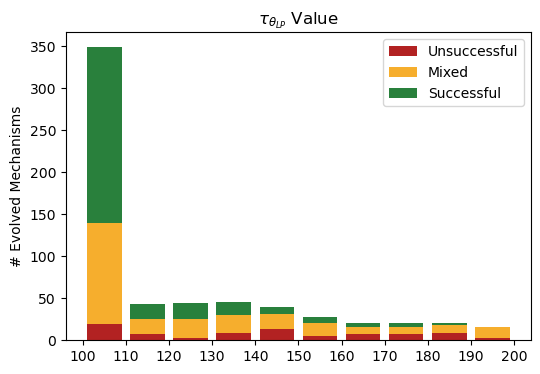

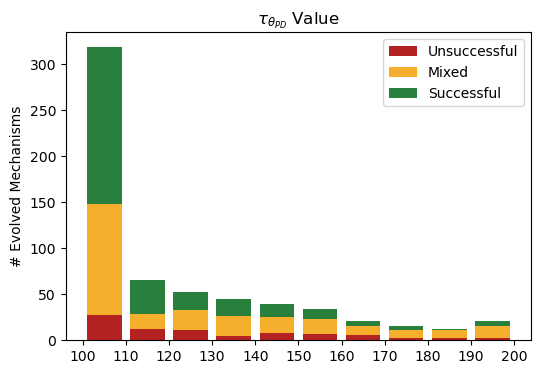

In [7]:
bins = np.arange(100,200.01,10)
for i in [0,1]:
    hist = plt.hist([tauvals_bad[:,i].flatten(),tauvals_mixed.flatten(),tauvals_good[:,i].flatten()],bins,color=['firebrick',new_xanthous,new_viridian],label=['Unsuccessful','Mixed','Successful'],histtype='bar',stacked=True,rwidth=.8)
    plt.legend()
    plt.xticks(hist[1])
    plt.title(r'$\tau_{\theta_{%s}}$ Value'%abridged_neuronlabels[i])
    plt.ylabel('# Evolved Mechanisms')
    # plt.ylim(0,270)
    plt.show()

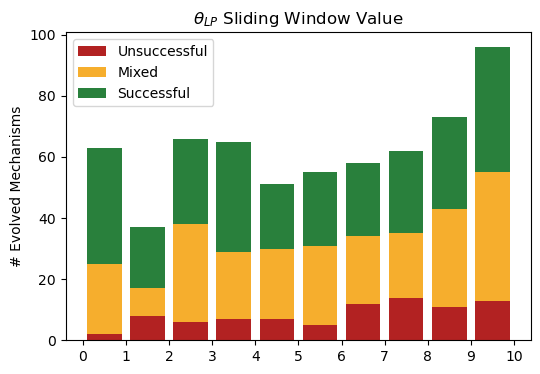

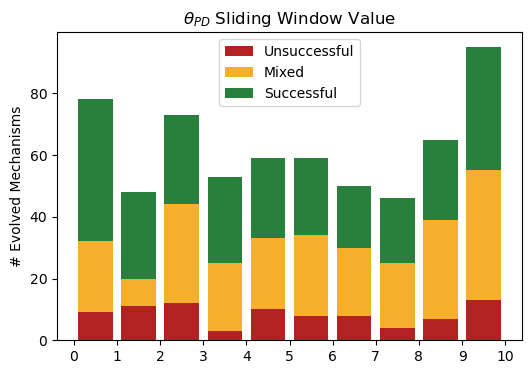

In [8]:
bins = np.arange(0,10.01,1)
for i in [0,1]:
    hist = plt.hist([SWvals_bad[:,i].flatten(),SWvals_mixed.flatten(),SWvals_good[:,i].flatten()],bins,color=['firebrick',new_xanthous,new_viridian],label=['Unsuccessful','Mixed','Successful'],histtype='bar',stacked=True,rwidth=.8)
    plt.legend()
    plt.xticks(hist[1])
    plt.title(r'$\theta_{%s}$ Sliding Window Value'%abridged_neuronlabels[i])
    plt.ylabel('# Evolved Mechanisms')
    # plt.ylim(0,270)
    plt.show()

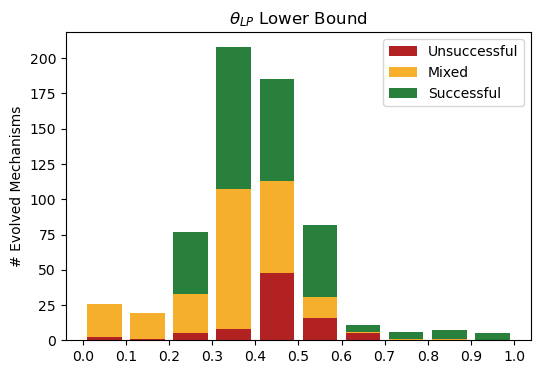

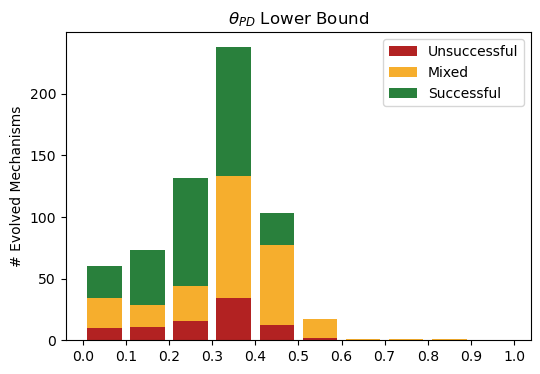

In [9]:
bins = np.arange(0,1.01,.1)
for i in [0,1]:
    hist = plt.hist([LBvals_bad[:,i].flatten(),LBvals_mixed.flatten(),LBvals_good[:,i].flatten()],bins,color=['firebrick',new_xanthous,new_viridian],label=['Unsuccessful','Mixed','Successful'],histtype='bar',stacked=True,rwidth=.8)
    plt.legend()
    plt.xticks(hist[1])
    plt.title(r'$\theta_{%s}$ Lower Bound'%abridged_neuronlabels[i])
    plt.ylabel('# Evolved Mechanisms')
    # plt.ylim(0,270)
    plt.show()

In [1]:
print(rangevals_good)

NameError: name 'rangevals_good' is not defined

For each HP meta-parameter, is the distribution asssociated with successful, mixed, and unsucessful mechanisms distributed the same way? let's do a two-sample ks test to find out

In [19]:
print(stats.ks_2samp(tauvals_mixed[:,1],tauvals_good[:,1]))
print(stats.ks_2samp(LBvals_mixed[:,0],LBvals_good[:,0]))
print(stats.ks_2samp(rangevals_mixed[:,0],rangevals_good[:,0]))

KstestResult(statistic=0.15765914208820783, pvalue=0.022176982924183512)
KstestResult(statistic=0.16938540121931125, pvalue=0.011200463063529634)
KstestResult(statistic=0.5431152853298182, pvalue=2.1612887489149627e-24)


aaaaand they're all too significant...can't tease apart the range vals

So, I'll try to find linear correlation between the number of ICs solved and the different metaparameters

In [30]:
def calc_Rsquared(residuals,y):
    ss_res = np.sum(residuals**2)

    # Calculate total sum of squares
    y_mean = np.mean(y)
    ss_tot = np.sum((y - y_mean)**2)

    # Calculate R-squared
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

ValueError: too many values to unpack (expected 3)

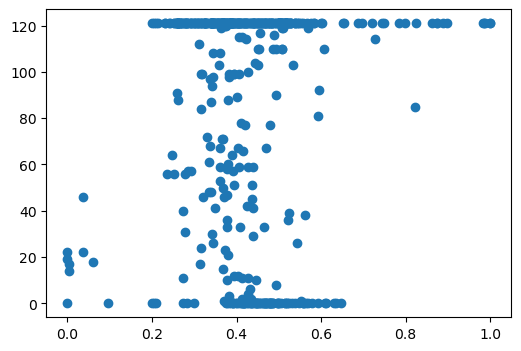

In [32]:
plt.scatter(LBvals.reshape((-1,2))[:,0],pylorics.flatten())
m, b, residuals = np.polyfit(LBvals.reshape((-1,2))[:,0], pylorics.flatten(), 1,full=True)
line_y = m * LBvals.reshape((-1,2))[:,0] + b
plt.plot(LBvals.reshape((-1,2))[:,0],line_y)
plt.title('LB1')
plt.show()
rsquared = calc_Rsquared(residuals,pylorics.flatten())
print(rsquared)
plt.scatter(LBvals.reshape((-1,2))[:,1],pylorics.flatten())
m, b = np.polyfit(LBvals.reshape((-1,2))[:,1], pylorics.flatten(), 1)
line_y = m * LBvals.reshape((-1,2))[:,1] + b
plt.plot(LBvals.reshape((-1,2))[:,1],line_y)
plt.title('LB1')
plt.show()
print(m)

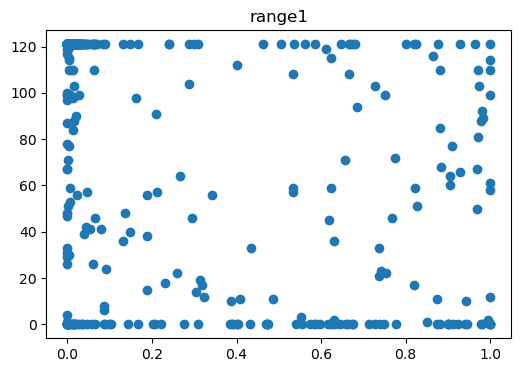

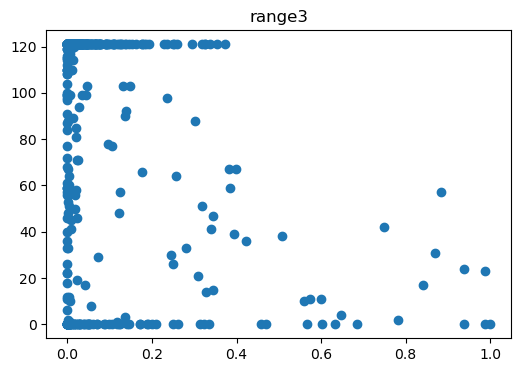

In [25]:
plt.scatter(rangevals.reshape((-1,2))[:,0],pylorics.flatten())
plt.title('range1')
plt.show()
plt.scatter(rangevals.reshape((-1,2))[:,1],pylorics.flatten())
plt.title('range3')
plt.show()

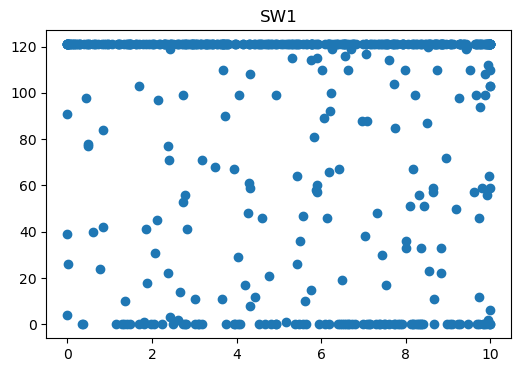

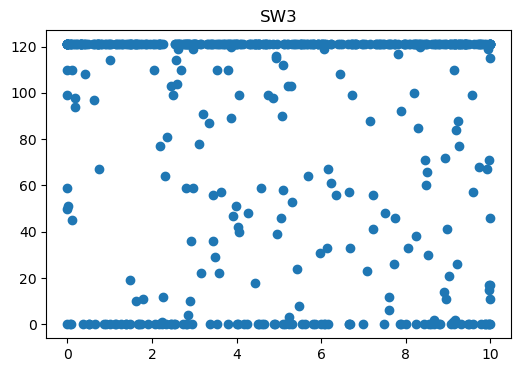

In [26]:
plt.scatter(SWvals.reshape((-1,2))[:,0],pylorics.flatten())
plt.title('SW1')
plt.show()
plt.scatter(SWvals.reshape((-1,2))[:,1],pylorics.flatten())
plt.title('SW3')
plt.show()

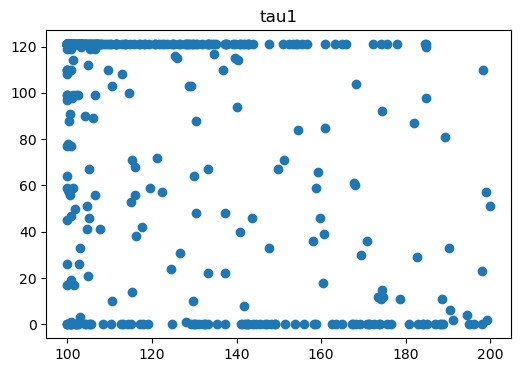

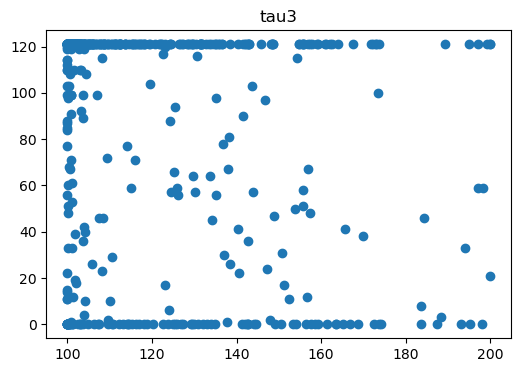

In [27]:
plt.scatter(tauvals.reshape((-1,2))[:,0],pylorics.flatten())
plt.title('tau1')
plt.show()
plt.scatter(tauvals.reshape((-1,2))[:,1],pylorics.flatten())
plt.title('tau3')
plt.show()